In [1]:
import torch
import gym
import numpy as np

from envs import EconModel, AiyagariEnv
from utils import configObj
from dpsolver import DPSolver

import matplotlib.pyplot as plt

In [2]:
config_name = 'config'
cfg = configObj(config_name,verbose=False)
env = AiyagariEnv(cfg)
dp = DPSolver(env)

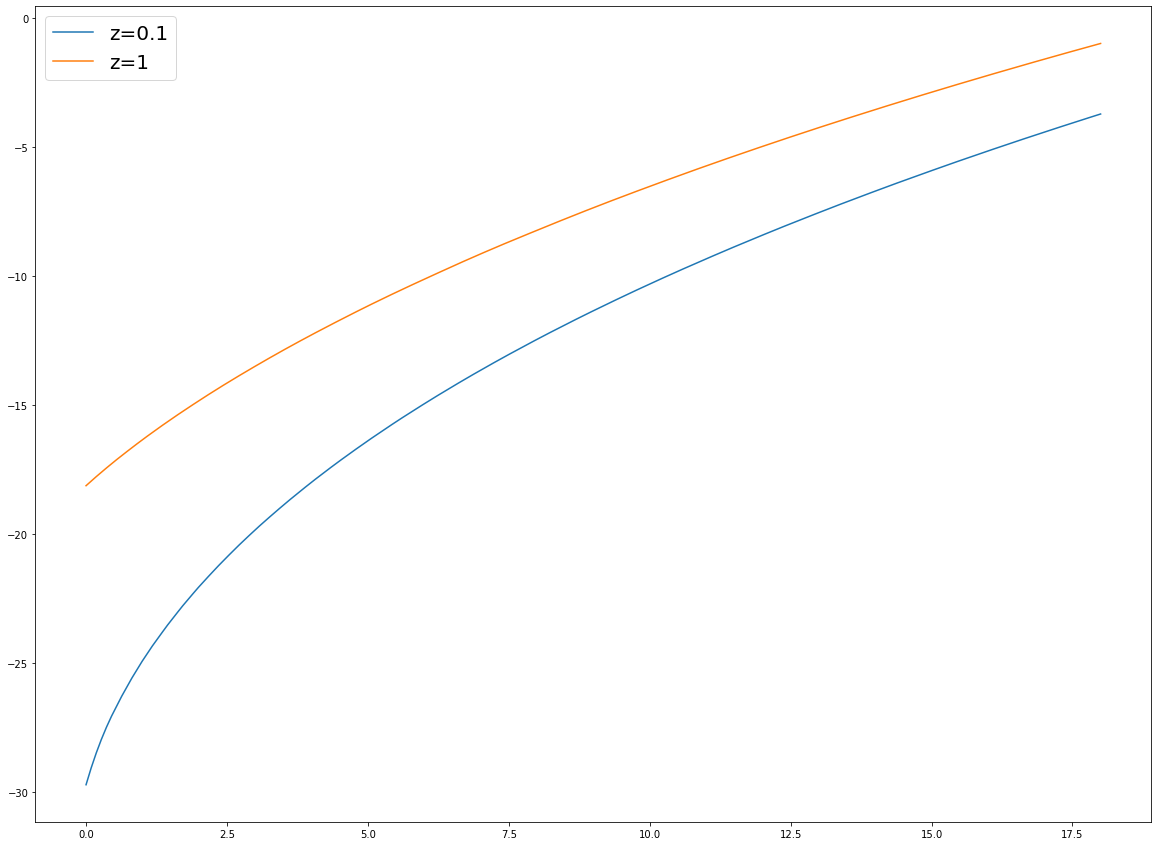

In [3]:
v = dp.result.v.reshape(200, 2).T

fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(env.a_vals, v[0, :], label='z=0.1')
plt.plot(env.a_vals, v[1, :], label='z=1')
plt.legend(fontsize=20);

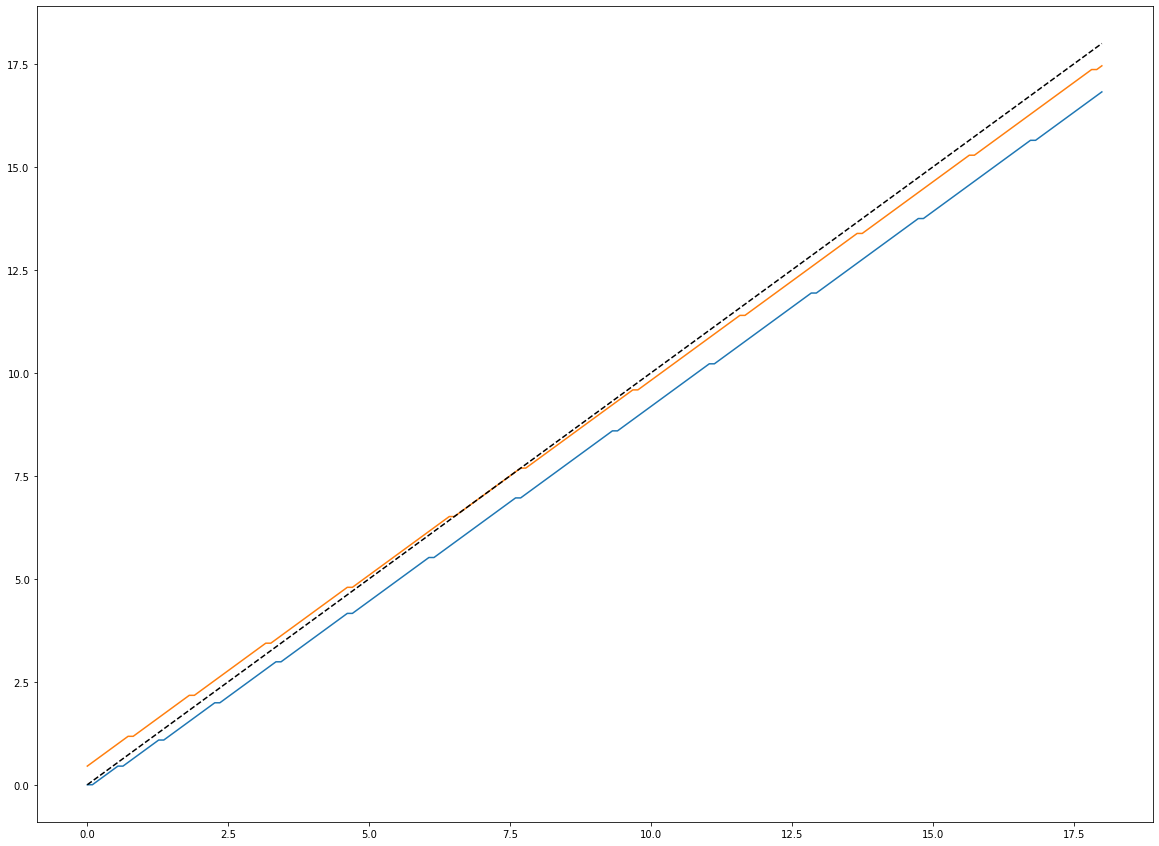

In [4]:
fig, ax = plt.subplots(figsize=(20, 15))
a = dp.result.sigma.reshape(200, 2).T
plt.plot(env.a_vals, env.a_vals[a[0]])
plt.plot(env.a_vals, env.a_vals[a[1]])
plt.plot(env.a_vals, env.a_vals, 'k--')

In [5]:
x = env.a_vals
y = env.z_vals
z = v

In [6]:
from scipy.interpolate import interp2d
model = interp2d(x, y, z)

In [7]:
a = np.random.choice(env.a_vals, 10)
b = np.random.choice(env.z_vals, 10)

In [8]:
a, b

(array([16.3718593 ,  8.14070352,  2.89447236, 12.12060302, 14.74371859,
        10.49246231, 14.74371859, 11.48743719, 17.09547739,  8.14070352]),
 array([1. , 1. , 0.1, 1. , 0.1, 0.1, 1. , 0.1, 0.1, 1. ]))

In [9]:
model(a, b)[:, 0]

array([-20.05705718, -20.05705718, -20.05705718, -20.05705718,
       -20.05705718, -13.62888833, -13.62888833, -13.62888833,
       -13.62888833, -13.62888833])

In [10]:
env.R.shape

(400, 200)

In [15]:
state = env.gen_states(10)
state.shape

torch.Size([32, 2])

In [16]:
a, z = state[:, 0], state[:, 1]

In [18]:
a, z

(tensor([1.0000e-10, 1.2000e+00, 2.4000e+00, 3.6000e+00, 4.8000e+00, 6.0000e+00,
         7.2000e+00, 8.4000e+00, 9.6000e+00, 1.0800e+01, 1.2000e+01, 1.3200e+01,
         1.4400e+01, 1.5600e+01, 1.6800e+01, 1.8000e+01, 1.0000e-10, 1.2000e+00,
         2.4000e+00, 3.6000e+00, 4.8000e+00, 6.0000e+00, 7.2000e+00, 8.4000e+00,
         9.6000e+00, 1.0800e+01, 1.2000e+01, 1.3200e+01, 1.4400e+01, 1.5600e+01,
         1.6800e+01, 1.8000e+01]),
 tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000]))